DS-1

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\risha\Desktop\archive\data.csv")

In [3]:
df.head()
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [4]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
df.shape

(11914, 16)

In [7]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [8]:
df['Driven_Wheels']=df['Driven_Wheels'].astype('string')

In [9]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         string
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [10]:
df.isnull().sum()
df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean(),inplace=True)
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [11]:
df['Engine Cylinders']=df['Engine Cylinders'].astype(int)

In [12]:
from sklearn.preprocessing import MinMaxScaler

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [13]:
scaler=MinMaxScaler()

In [14]:
df['Engine Cylinders']=scaler.fit_transform(df['Engine Cylinders'].values.reshape(-1,1))

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Driven_Wheels']=encoder.fit_transform(df['Driven_Wheels'])

In [16]:
df['Driven_Wheels']

0        3
1        3
2        3
3        3
4        3
        ..
11909    0
11910    0
11911    0
11912    0
11913    2
Name: Driven_Wheels, Length: 11914, dtype: int32

DS-2

In [34]:
import numpy as np
import pandas as pd

In [35]:
data={
    "Roll_no":[1,2,3,4,5],
    "Name":["a","b","c","d","e"],
    "maths_marks":[100,45,None,30,20],
    "english_marks":[37,56,64,31,78]
}

In [19]:
df=pd.DataFrame(data)

In [36]:
df

: 

: 

In [21]:
df.isnull().sum()

Roll_no          0
Name             0
maths_marks      1
english_marks    0
dtype: int64

In [22]:
df.columns

Index(['Roll_no', 'Name', 'maths_marks', 'english_marks'], dtype='object')

In [23]:
missing_col=[]
for i in df.columns:
    if df[i].isna().any() :
        missing_col.append(i)
        
missing_col
      

['maths_marks']

In [24]:
for i in missing_col:
    df[i].fillna(df[i].mean,inplace=True)

In [25]:
df['english_marks']

0    37
1    56
2    64
3    31
4    78
Name: english_marks, dtype: int64

In [26]:
z_score=df['english_marks']-df['english_marks'].mean()/df['english_marks'].std()

In [27]:
print(z_score)

0    34.24799
1    53.24799
2    61.24799
3    28.24799
4    75.24799
Name: english_marks, dtype: float64


In [33]:
outliers=df[np.abs(z_score)>1]
print(len(outliers))

5


In [29]:
filtered_df=df.drop(outliers.index)

In [30]:
filtered_df


,Roll_no,Name,maths_marks,english_marks


In [31]:
df['english_marks']=np.log(df['english_marks'])

In [32]:
df['english_marks']

0    3.610918
1    4.025352
2    4.158883
3    3.433987
4    4.356709
Name: english_marks, dtype: float64

Ds-3

In [3]:
import seaborn as sns
import pandas as pd
df=sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df.groupby(["sex","pclass"])["age"].describe()

count       mean        std   min     25%   50%    75%   max
sex    pclass                                                              
female 1        85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       2        74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       3       102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
male   1       101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
       2        99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
       3       253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

In [12]:
import seaborn as sns
import pandas as pd

In [13]:
df=sns.load_dataset('iris')

In [16]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
df.describe()
df=df[df["species"]=="setosa"]

In [20]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


DATA VISULAIZATION I & II

In [30]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df=sns.load_dataset('titanic')

In [32]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


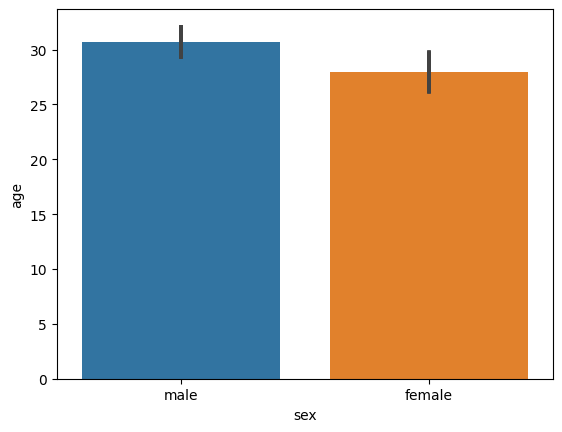

In [34]:
sns.barplot(x='sex',y='age',data=df)
plt.show()

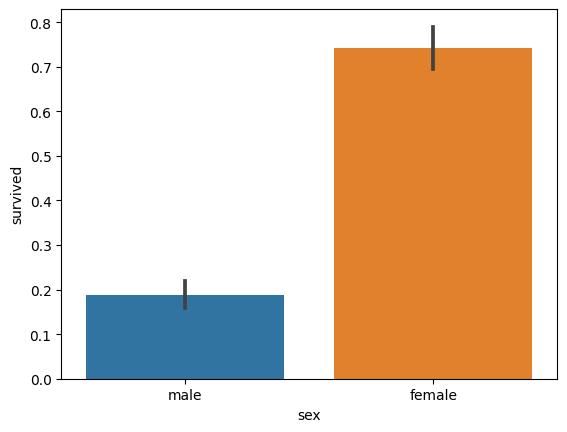

In [35]:
sns.barplot(x="sex",y="survived",data=df)
plt.show()

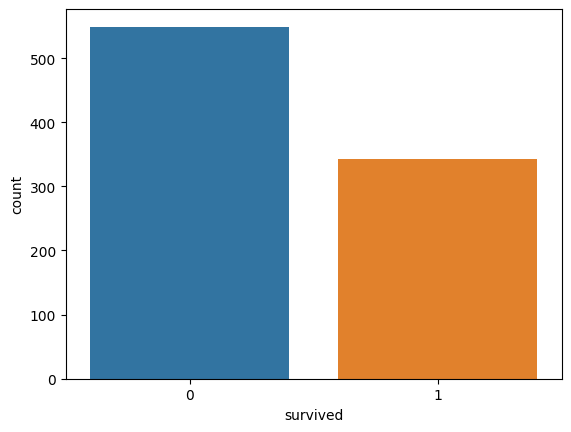

In [37]:
sns.countplot(x="survived",data=df)
plt.show()

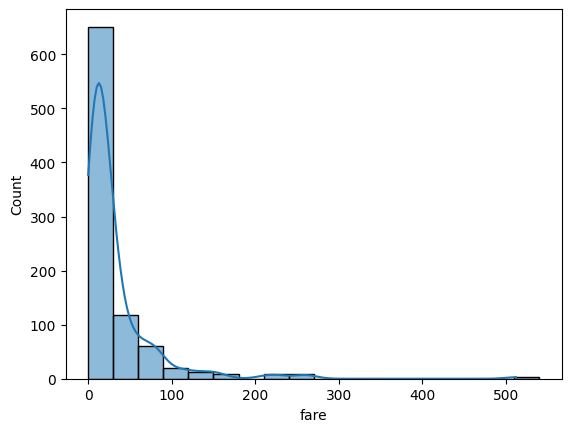

In [40]:
sns.histplot(data=df,x="fare",binwidth=30,kde=True)
plt.show()

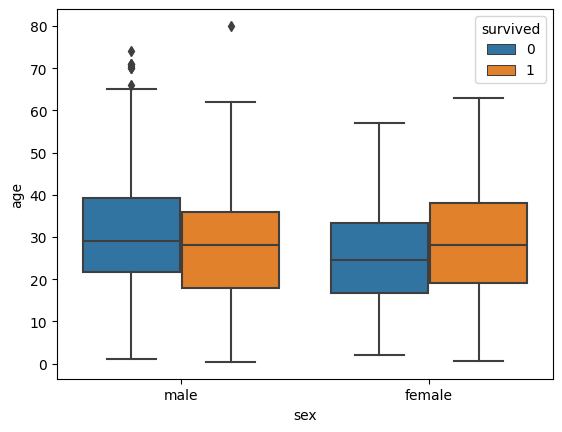

In [42]:
sns.boxplot(data=df,x="sex",y="age",hue="survived")
plt.show()